In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

dir_path = os.getcwd()
plt.style.use("bmh")
mpl.rcParams['lines.linewidth'] = 1

## Load all relevant data

In [2]:
mothly_ret_etfs_df = pd.read_csv(os.path.join(dir_path, "data", "inputs", "monthly_ret_etfs.csv"))
mothly_ret_etfs_df["date"] = pd.to_datetime(mothly_ret_etfs_df["date"])

# set date as index to make it easier to merge with macro data
mothly_ret_etfs_df.set_index("date", inplace=True)

features = pd.read_csv(os.path.join(dir_path, "data", "inputs", "fredmd_transf.csv"))
features["date"] = pd.to_datetime(features["date"])
# set date as index to make it easier to merge with etfs data
features.set_index("date", inplace=True)

features_level = pd.read_csv(os.path.join(dir_path, "data", "inputs", "fredmd_raw.csv"))
features_level["date"] = pd.to_datetime(features_level["date"])
# set date as index to make it easier to merge with etfs data
features_level.set_index("date", inplace=True)

<Axes: xlabel='date'>

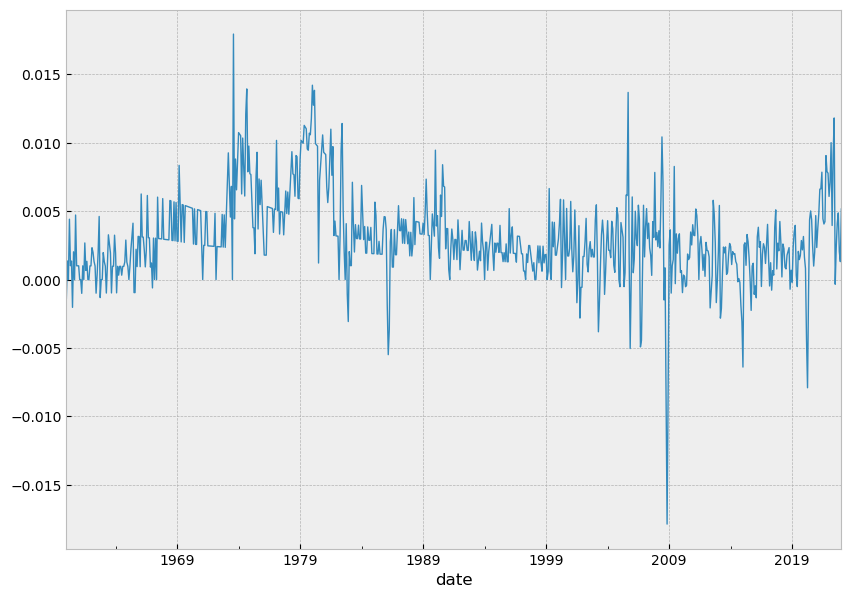

In [5]:
features["CPIAUCSL"].plot(figsize=(10, 7))

<Axes: xlabel='date'>

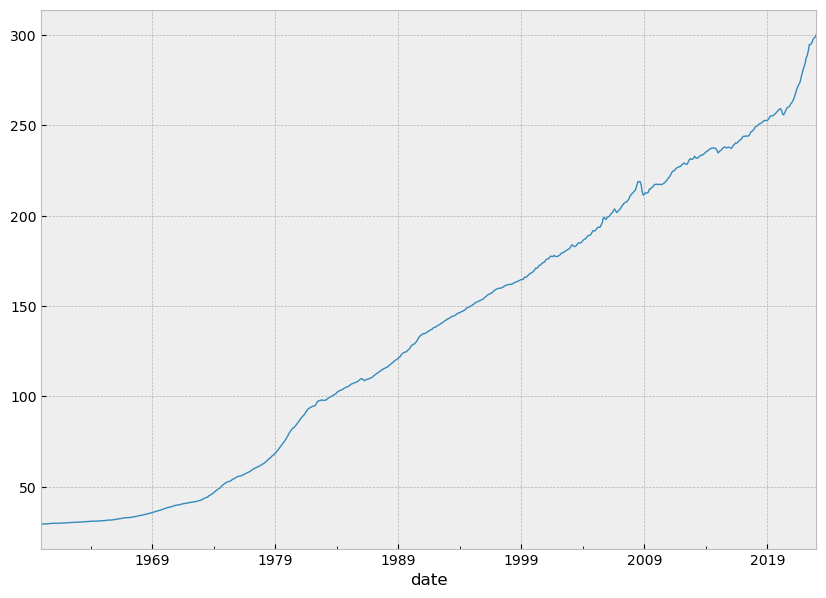

In [6]:
features_level["CPIAUCSL"].plot(figsize=(10, 7))

<Axes: xlabel='date'>

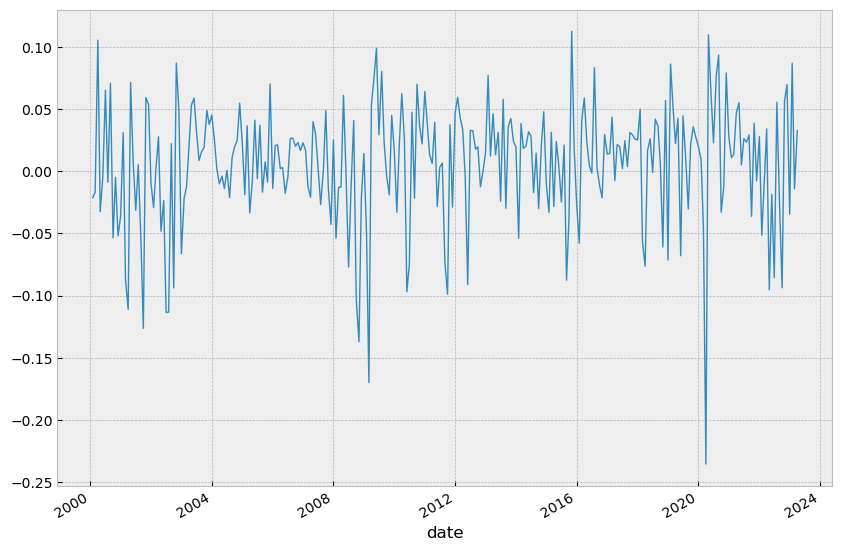

In [7]:
mothly_ret_etfs_df["SPY"].plot(figsize=(10, 7))

## Merge datasets

Most of the macroeconomic timeseries are indexes on the original (raw) data. Maybe it will be easier to start with the tranformed (transf) dataset.

We have 28 etfs in total. Since not all of them are available since 2000, we arbitrarily choose 2010 as the start date. This decision implies that we end up with 28 etfs plus 119 features after merging. Furthremore, we have 152 monthly observations. 

In [8]:
mothly_ret_etfs_df.dropna(axis=0, how="all").dropna(axis=1, how="any").tail()

,SPY,XLI,XLE,XLK,XLV,XLU,XLF,XLY,XLP,XLB
date,,,,,,,,,,
2022-12-01,0.069628,0.095635,0.021248,0.092025,0.064510,0.084149,0.078935,0.009073,0.070630,0.112832
2023-01-02,-0.034641,-0.012648,-0.021265,-0.049387,-0.001986,0.004122,-0.037025,-0.093013,-0.018737,-0.036032
2023-02-01,0.086764,0.051914,0.024574,0.136286,-0.006546,-0.020876,0.077902,0.182374,-0.003626,0.096261
2023-03-01,-0.014112,0.011908,-0.056051,0.011354,-0.050379,-0.071378,-0.012839,0.014015,-0.025272,-0.009654
2023-04-03,0.032698,0.001580,0.019477,0.097089,0.021543,0.016044,-0.101472,0.017222,0.033442,-0.003566


In [14]:
mothly_ret_etfs_df.shape

(280, 36)

In [17]:
big_mothly_ret_etfs_df = mothly_ret_etfs_df.dropna(axis=0, how="all").dropna(axis=1, how="any")

In [18]:
mothly_ret_etfs_df.loc["2010-01-01":, :].dropna(axis=0, how="all").dropna(axis=1, how="any").head()

,SPY,XLI,XLE,XLK,XLV,XLU,XLF,XLY,XLP,XLB,...,IEF,IEI,SHY,MBB,VCIT,UUP,FXE,FXB,FXY,FXA
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.016923,0.013404,-0.000175,0.054673,0.009053,0.049903,0.008365,0.039395,-0.015370,0.019590,...,-0.047499,-0.030926,-0.016261,-0.021740,-0.011154,0.036175,-0.044345,-0.020881,-0.070524,-0.008733
2010-02-01,-0.033009,-0.014646,-0.028196,-0.084965,-0.005073,-0.058167,-0.004150,-0.029612,-0.012423,-0.064858,...,0.014423,0.011351,0.004561,0.007970,0.017949,0.016408,-0.031919,-0.003075,0.010379,0.002808
2010-03-01,0.019129,0.041935,-0.000176,0.005935,0.001263,-0.015442,0.031746,0.060846,0.032863,0.002191,...,0.001547,0.003484,0.000718,-0.002985,-0.001444,0.028653,-0.042960,-0.080156,0.012472,-0.007080
2010-04-01,0.062435,0.090139,0.044180,0.062632,0.028887,0.023554,0.097240,0.081884,0.034380,0.091579,...,-0.016702,-0.012019,-0.004554,-0.007449,0.002102,-0.002111,0.001773,0.001051,-0.053020,0.032895
2010-05-03,0.025499,0.057300,0.058101,0.027364,-0.038253,0.033644,0.027702,0.070261,-0.008956,-0.002059,...,0.011259,0.005394,0.000600,-0.002803,0.008863,0.011262,-0.021424,0.016736,-0.023204,0.008061


In [19]:
merge_transf_df = mothly_ret_etfs_df.loc["2010-01-01":, :].dropna(axis=0, how="all").dropna(axis=1, how="any").merge(features, left_index=True, right_index=True, how="left").dropna()
merge_transf_df.head()

,SPY,XLI,XLE,XLK,XLV,XLU,XLF,XLY,XLP,XLB,...,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,0.016923,0.013404,-0.000175,0.054673,0.009053,0.049903,0.008365,0.039395,-0.015370,0.019590,...,0.004413,0.004091,-0.001738,0.000299,0.003212,0.000397,0.002184,-0.001284,0.003983,0.002112
2010-02-01,-0.033009,-0.014646,-0.028196,-0.084965,-0.005073,-0.058167,-0.004150,-0.029612,-0.012423,-0.064858,...,-0.003179,-0.001099,0.000527,-0.001151,-0.001333,-0.001305,-0.000031,-0.003551,-0.002218,0.001206
2010-03-01,0.019129,0.041935,-0.000176,0.005935,0.001263,-0.015442,0.031746,0.060846,0.032863,0.002191,...,-0.001056,-0.001145,0.001430,0.000064,0.000645,0.000100,0.001415,-0.001435,-0.000044,0.002325
2010-04-01,0.062435,0.090139,0.044180,0.062632,0.028887,0.023554,0.097240,0.081884,0.034380,0.091579,...,-0.001511,-0.002564,0.001267,0.000106,0.000250,0.000081,0.000544,-0.003841,-0.000730,0.001620
2010-06-01,-0.096974,-0.112625,-0.171444,-0.095607,-0.071302,-0.065117,-0.104880,-0.090794,-0.044270,-0.129660,...,-0.002530,-0.001953,0.000981,-0.000452,-0.000939,-0.000651,-0.000419,-0.003396,-0.003020,0.000875


In [20]:
merge_transf_df.shape

(109, 155)

<Axes: title={'center': 'SPY vs CPIAUCSL'}, xlabel='Date'>

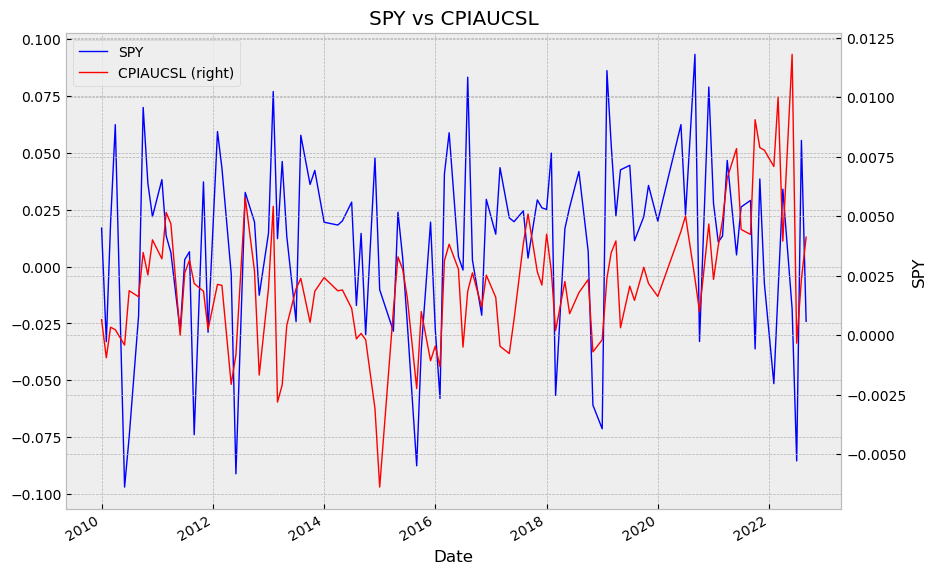

In [21]:
merge_transf_df.plot(y=["SPY", "CPIAUCSL"],
                     secondary_y=["CPIAUCSL"],
                     figsize=(10, 7),
                     legend=True,
                     title="SPY vs CPIAUCSL",
                     xlabel="Date",
                     ylabel="SPY",
                     grid=True,
                     color=["blue", "red"],
                     linewidth=1,
                     linestyle="-",
                    #  marker="o",
                     markersize=5,
                     markerfacecolor="red")

In [18]:
# export merged data
merge_transf_df.to_csv(os.path.join(dir_path, "data", "inputs", "monthly_ret_etfs_macro_transf.csv"), index=True)

In [22]:
big_merge_transf_df = big_mothly_ret_etfs_df.dropna(axis=0, how="all").dropna(axis=1, how="any").merge(features, left_index=True, right_index=True, how="left").dropna()


In [24]:
# export merged data
big_merge_transf_df.to_csv(os.path.join(dir_path, "data", "inputs", "big_monthly_ret_etfs_macro_transf.csv"), index=True)